## TFIDF 
#### Train Test Split on recipe_train.csv

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Test to see approximate accuracy by splitting the training data to train and test data = 7:3
train_file = "./COMP30027_2021_Project2_datasets/recipe_train.csv"
train_data = pd.read_csv(train_file)
X_train_raw = train_data.iloc[:,:-1]
y_train_raw = train_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_train_raw,y_train_raw,test_size=0.33)

train_n_steps = pd.DataFrame(X_train.n_steps)
train_n_steps.reset_index(drop=True, inplace=True)
test_n_steps = pd.DataFrame(X_test.n_steps)
test_n_steps.reset_index(drop=True, inplace=True)

train_n_ingredients = pd.DataFrame(X_train.n_ingredients)
train_n_ingredients.reset_index(drop=True, inplace=True)
test_n_ingredients = pd.DataFrame(X_test.n_ingredients)
test_n_ingredients.reset_index(drop=True, inplace=True)

# tfidf vectorizer on feature 'name'
vec = TfidfVectorizer(stop_words='english')
X_train_name = vec.fit_transform(X_train.name)
X_test_name = vec.transform(X_test.name)
df_train_name = pd.DataFrame(X_train_name.todense(),columns = vec.get_feature_names())
df_test_name = pd.DataFrame(X_test_name.todense(),columns = vec.get_feature_names())

# tfidf vectorizer on feature 'steps'
X_train_steps = vec.fit_transform(X_train.steps)
X_test_steps = vec.transform(X_test.steps)
df_train_steps = pd.DataFrame(X_train_steps.todense(),columns = vec.get_feature_names())
df_test_steps = pd.DataFrame(X_test_steps.todense(),columns = vec.get_feature_names())

# tfidf vectorizer on feature 'ingredients'
X_train_ing = vec.fit_transform(X_train.ingredients)
X_test_ing = vec.transform(X_test.ingredients)
df_train_ing = pd.DataFrame(X_train_ing.todense(),columns = vec.get_feature_names())
df_test_ing = pd.DataFrame(X_test_ing.todense(),columns = vec.get_feature_names())

train = pd.concat([df_train_name, df_train_steps,df_train_ing,train_n_steps,train_n_ingredients],axis=1)
test = pd.concat([df_test_name, df_test_steps,df_test_ing,test_n_steps,test_n_ingredients],axis=1)


### Individual Classifiers - All Features

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import time
from time import ctime

models = [MultinomialNB(),
          DecisionTreeClassifier(),
          LogisticRegression()]

titles = ['MNB',
          'Decision Tree',
          'Logistic Regression']

for title, model in zip(titles, models):
    print(title)
    start = time.time()
    print("START ",start)
    model.fit(train,y_train)
    acc = model.score(test,y_test)
    end = time.time()
    print("END ",end)
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t," s")


MNB
START  1621522338.6477172
END  1621522390.8963652
MNB Accuracy: 0.7128787878787879 Time: 52.248647928237915  s
Decision Tree
START  1621522390.903011
END  1621522474.349726
Decision Tree Accuracy: 0.7268181818181818 Time: 83.44671487808228  s
Logistic Regression
START  1621522474.35428
/Users/patriciaangelica/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
END  1621523190.040225
Logistic Regression Accuracy: 0.7847727272727273 Time: 715.6859450340271  s


### Stacking - All Features

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [('MNB',MultinomialNB()),('DT',DecisionTreeClassifier())]
stack_clf = StackingClassifier(estimators=classifiers, 
            final_estimator=LogisticRegression(),cv=5).fit(train,y_train)
acc = stack_clf.score(test,y_test)
print("Accuracy ",acc)

Accuracy  0.7665151515151515


### CHI SQUARE, K=1000

In [4]:
from sklearn.feature_selection import SelectKBest, chi2
import time
from time import ctime

kbest_chi2 = SelectKBest(chi2, k=1000).fit(train, y_train)
X_train_kbest_chi2 = kbest_chi2.transform(train)
X_test_kbest_chi2 = kbest_chi2.transform(test)

### Individual Classifiers - CHI SQUARE, K=1000

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = [MultinomialNB(),
          DecisionTreeClassifier(),
          LogisticRegression()]
          
titles = ['MNB',
          'Decision Tree',
          'Logistic Regression']

for title, model in zip(titles, models):
    print(title)
    start = time.time()
    print("START ",start)
    model.fit(X_train_kbest_chi2,y_train)
    acc = model.score(X_test_kbest_chi2,y_test)
    end = time.time()
    print("END ",end)
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t," s")

MNB
START  1621523722.1814091
END  1621523722.3868291
MNB Accuracy: 0.7159848484848484 Time: 0.20542001724243164  s
Decision Tree
START  1621523722.3873842
END  1621523727.293555
Decision Tree Accuracy: 0.728560606060606 Time: 4.906170845031738  s
Logistic Regression
START  1621523727.29383
END  1621523733.714261
Logistic Regression Accuracy: 0.7881060606060606 Time: 6.420431137084961  s
/Users/patriciaangelica/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Confusion Matrix for TFIDF - CHI SQUARE K=1000

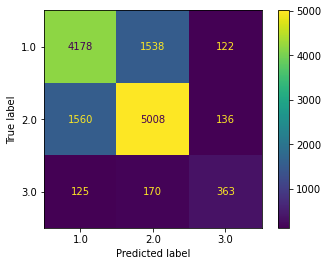

In [6]:
### Confusion Matrix for TFIDF - CHI SQUARE K=1000
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

decision_tree = DecisionTreeClassifier().fit(X_train_kbest_chi2,y_train)
prediction = decision_tree.predict(X_test_kbest_chi2)

cm = confusion_matrix(y_test, prediction,labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

### STACKING - CHI SQUARE

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [('MNB',MultinomialNB()),('DT',DecisionTreeClassifier())]
stack_clf = StackingClassifier(estimators=classifiers, final_estimator=LogisticRegression(),cv=5).fit(X_train_kbest_chi2, y_train)
acc = stack_clf.score(X_test_kbest_chi2, y_test)
print("Accuracy ",acc)

Accuracy  0.758560606060606
